# Logistic Regression

## Importing the libraries

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [34]:
dataset = pd.read_csv('HR_Dataset.csv.xls')
X = dataset.iloc[:, :-3].values
y = dataset.iloc[:, -3].values

## Splitting the dataset into the Training set and Test set

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [36]:
print(X)

[[0.38 0.53 2.   ... 3.   0.   1.  ]
 [0.8  0.86 5.   ... 6.   0.   1.  ]
 [0.11 0.88 7.   ... 4.   0.   1.  ]
 ...
 [0.37 0.53 2.   ... 3.   0.   1.  ]
 [0.11 0.96 6.   ... 4.   0.   1.  ]
 [0.37 0.52 2.   ... 3.   0.   1.  ]]


In [37]:
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder
# ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 3, 8])], remainder='passthrough')
# X = np.array(ct.fit_transform(X))

In [38]:
print(X)

[[0.38 0.53 2.   ... 3.   0.   1.  ]
 [0.8  0.86 5.   ... 6.   0.   1.  ]
 [0.11 0.88 7.   ... 4.   0.   1.  ]
 ...
 [0.37 0.53 2.   ... 3.   0.   1.  ]
 [0.11 0.96 6.   ... 4.   0.   1.  ]
 [0.37 0.52 2.   ... 3.   0.   1.  ]]


In [39]:
print(y)

[0 0 0 ... 0 0 0]


In [40]:
y = y.reshape(len(y),1)

In [41]:
print(y)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
y = np.array(ct.fit_transform(y))

In [43]:
print(y)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


## Training the Logistic Regression model on the Training set

In [44]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

## Predicting the Test set results

In [45]:
y_pred = classifier.predict(X_test)

## Making the Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[2933    0]
 [  67    0]]


## Computing the accuracy with k-Fold Cross Validation

In [47]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

# Load example dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the classifier with increased iterations
classifier = LogisticRegression(max_iter=1000, solver='lbfgs', random_state=0)

# Calculate cross-validation scores
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

# Print the results
print("Accuracy: {:.2f} %".format(accuracies.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies.std() * 100))


Accuracy: 95.00 %
Standard Deviation: 5.53 %


In [48]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Load example dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Build a simple neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

In [49]:
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model and store the history
history = model.fit(x=X_train,
                    y=y_train,
                    validation_data=(X_val, y_val),
                    batch_size=32,
                    epochs=50,
                    verbose=1)


Epoch 1/50
4/4 [==============================] - 1s 64ms/step - loss: 1.1186 - accuracy: 0.2381 - val_loss: 1.0729 - val_accuracy: 0.4545
Epoch 2/50
4/4 [==============================] - 0s 20ms/step - loss: 1.0172 - accuracy: 0.5238 - val_loss: 0.9995 - val_accuracy: 0.6818
Epoch 3/50
4/4 [==============================] - 0s 13ms/step - loss: 0.9335 - accuracy: 0.7810 - val_loss: 0.9312 - val_accuracy: 0.8636
Epoch 4/50
4/4 [==============================] - 0s 13ms/step - loss: 0.8601 - accuracy: 0.8381 - val_loss: 0.8679 - val_accuracy: 0.8182
Epoch 5/50
4/4 [==============================] - 0s 12ms/step - loss: 0.7928 - accuracy: 0.8381 - val_loss: 0.8093 - val_accuracy: 0.8182
Epoch 6/50
4/4 [==============================] - 0s 15ms/step - loss: 0.7298 - accuracy: 0.8571 - val_loss: 0.7535 - val_accuracy: 0.8182
Epoch 7/50
4/4 [==============================] - 0s 14ms/step - loss: 0.6750 - accuracy: 0.8667 - val_loss: 0.7015 - val_accuracy: 0.8182
Epoch 8/50
4/4 [===========

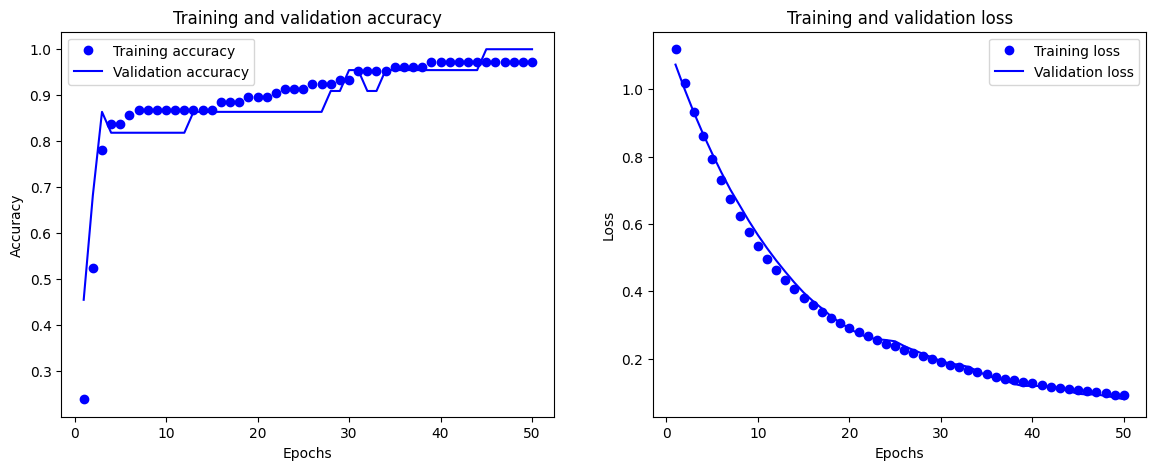

In [50]:
import matplotlib.pyplot as plt

def plot_training_history(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    # Plot accuracy
    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'bo', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


plot_training_history(history)


Accuracy: 53.00 %
Standard Deviation: 4.93 %
Confusion Matrix:
 [[ 30 116]
 [ 36 118]]
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.21      0.28       146
           1       0.50      0.77      0.61       154

    accuracy                           0.49       300
   macro avg       0.48      0.49      0.45       300
weighted avg       0.48      0.49      0.45       300

ROC-AUC Score: 0.50


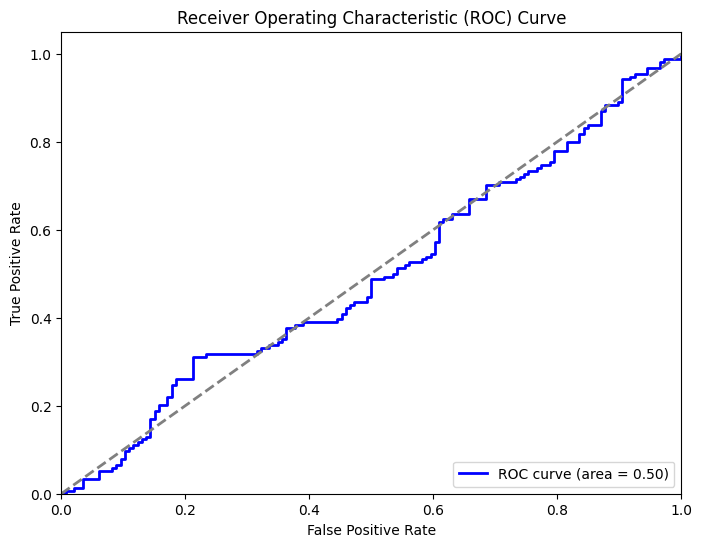

Feature Importance:
                  Feature  Importance
5          Work_accident    0.165550
6  promotion_last_5years    0.162982
2         number_project    0.057827
4     time_spend_company    0.014284
1        last_evaluation    0.014250
0     satisfaction_level    0.000889
3   average_montly_hours    0.000128


In [51]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, cross_val_score

np.random.seed(0)
hr_data = pd.DataFrame({
    'satisfaction_level': np.random.rand(1000),
    'last_evaluation': np.random.rand(1000),
    'number_project': np.random.randint(1, 5, size=1000),
    'average_montly_hours': np.random.randint(90, 310, size=1000),
    'time_spend_company': np.random.randint(1, 10, size=1000),
    'Work_accident': np.random.randint(0, 2, size=1000),
    'left': np.random.randint(0, 2, size=1000),
    'promotion_last_5years': np.random.randint(0, 2, size=1000)
})

X = hr_data.drop('left', axis=1)
y = hr_data['left']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize and train logistic regression model
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = classifier.predict(X_test)
#print accuracy
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies.std() * 100))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

# ROC-AUC
y_pred_prob = classifier.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score: {:.2f}".format(roc_auc))

# Plotting ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(classifier.coef_[0])
}).sort_values(by='Importance', ascending=False)
print("Feature Importance:\n", feature_importance)
